In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 30, 3
factors = [np.random.rand(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 0.1*np.random.randn(*data.shape) # add noise
data[data < 0] = 0.0

In [3]:
als_results = tt.fit_ensemble(data, range(1,9), nonneg=True, replicates=10, options=dict(tol=1e-6))
als_factors = als_results[R]['factors'][0]
als_factors = tt.align_factors(als_factors, factors)[0]

Optimizing rank-1 models.
   10/10 converged, min error = 0.3193, max error = 0.3193, mean error = 0.3193, time to fit = 0.0982s
Optimizing rank-2 models.
   10/10 converged, min error = 0.2556, max error = 0.2556, mean error = 0.2556, time to fit = 0.4825s
Optimizing rank-3 models.
   10/10 converged, min error = 0.2123, max error = 0.2123, mean error = 0.2123, time to fit = 0.4759s
Optimizing rank-4 models.
   10/10 converged, min error = 0.2116, max error = 0.2117, mean error = 0.2116, time to fit = 1.2445s
Optimizing rank-5 models.
   10/10 converged, min error = 0.2109, max error = 0.2116, mean error = 0.2110, time to fit = 1.5013s
Optimizing rank-6 models.
   10/10 converged, min error = 0.2103, max error = 0.2104, mean error = 0.2103, time to fit = 1.9053s
Optimizing rank-7 models.
   fitting replicate: 3/10    iter=1, obj=0.2321, variation=0.4469

/Users/alex/anaconda/envs/tf/lib/python3.5/site-packages/numpy/linalg/linalg.py:1487: RuntimeWarning: divide by zero encountered in true_divide
  return s[..., 0]/s[..., -1]


   10/10 converged, min error = 0.2097, max error = 0.2103, mean error = 0.2099, time to fit = 1.7629s
Optimizing rank-8 models.
   10/10 converged, min error = 0.2090, max error = 0.2097, mean error = 0.2091, time to fit = 2.5827s
Total time to fit models: 13.6105s


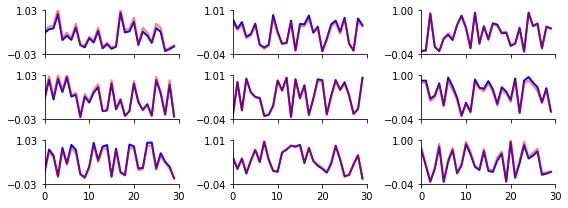

In [4]:
fig, axes, pl = tt.plot_factors(factors, line_kw=dict(color='b', lw=2))
tt.plot_factors(als_factors, line_kw=dict(color='r', lw=2, alpha=0.5), fig=fig);

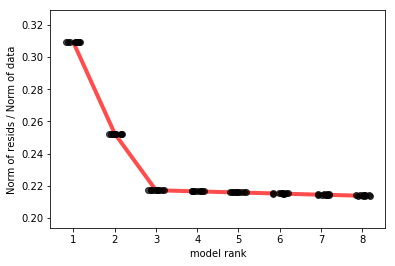

In [7]:
line_kw = {
    'color': 'r',
    'alpha': 0.7,
    'lw': 4,
    'zorder': -1
}
scatter_kw = {
    'color': 'k',
    'alpha': 0.7,
}
tt.plot_error(als_results,
              jitter=.4,
              line_kw=line_kw,
              scatter_kw=scatter_kw)